In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [156]:
file = "Resources/myopia.csv"

In [157]:
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [158]:
# Features of the dataset
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [159]:
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [160]:
# Remove the "MYOPIC" column from dataset
df2 = df.drop(columns=["MYOPIC"], axis=1)
df2.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [161]:
# Find null values
for column in df2.columns:
    print(f"Column {column} has {df2[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [162]:
# Standarize data with StandarScaler
df2_scaled = StandardScaler().fit_transform(df2)
print(df2_scaled[0:5])


[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


### PART 2: Apply Dimensionality Reduction

In [163]:
# Perform dimensionality reduction with PCA. How did the number of the features change?

# Initialize PCA model: Preserve 90% of the explained variance in dimensionality reduction.
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)

# Get the principal components for the df2_scaled data.
df2_pca = pca.fit_transform(df2_scaled)

# Transform PCA data to a DataFrame
new_pca_df = pd.DataFrame(data=df2_pca)
new_pca_df.head()


,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [164]:
# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915186

In [165]:
# Get the shape of features after reduction
df2_pca.shape

(618, 10)

In [166]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results. 
# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200)

In [167]:
tsne_features = tsne.fit_transform(new_pca_df)

In [168]:
tsne_features.shape

(618, 2)

In [169]:
# Prepare to plot the dataset

# The first column of transformed features
new_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
new_pca_df['y'] = tsne_features[:,1]


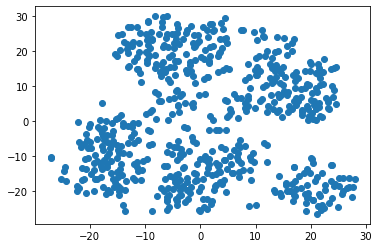

In [170]:
# Visualize the clusters
plt.scatter(new_pca_df['x'], new_pca_df['y'])
plt.show()

### Part 3: Perform a Cluster Analysis with K-means

In [171]:
from sklearn.cluster import KMeans

In [172]:
inertia = []
# Same as k = list(range(1, 11))
#k = [1,2,3,4,5,6,7,8,9,10]
k=[i for i in range(1,11)]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_pca_df)
    inertia.append(km.inertia_)           

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)


c:\Users\jlper\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


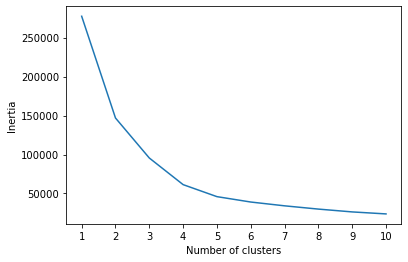

The elbow of the plot is at value of 5 clusters


In [173]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print('The elbow of the plot is at value of 5 clusters')


## Recommendation:
##### Based on the data findings, the patients would be able to be clustered. By looking at the scatter plot and elbow plot, I would recommend patients be placed into 5 clusters.